In [1]:
# #This code allows to output more than one variable value without using a print statement.
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
# -*- coding: utf-8 -*-

# load libraries
import seaborn as sns
import matplotlib.pyplot as plt

# load titanic dataset
titanic = sns.load_dataset('titanic')
titanic.head()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


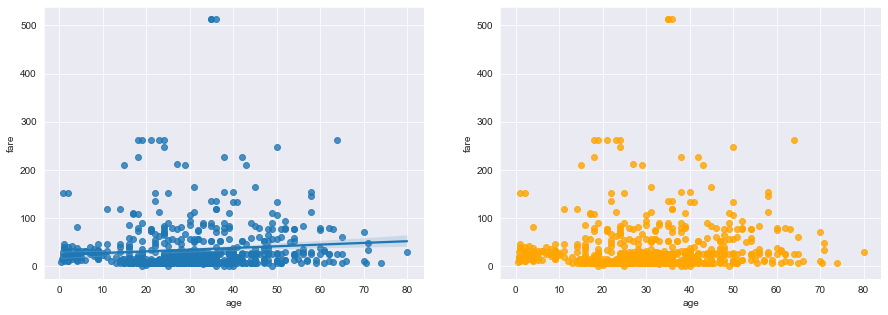

In [3]:
# scatterplot with a regression line (regplot)

# style theme (darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# fig, axes
fig, (ax1, ax2) = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)

# ax1
sns.regplot(x='age', y='fare', data=titanic, ax=ax1)

# ax2
sns.regplot(x='age', y='fare', data=titanic, ax=ax2, 
            color='orange',
            fit_reg=False) # no regression line

plt.show()

C:\Users\hawoo\anaconda3\envs\pycaret\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'titanic fare - hist')

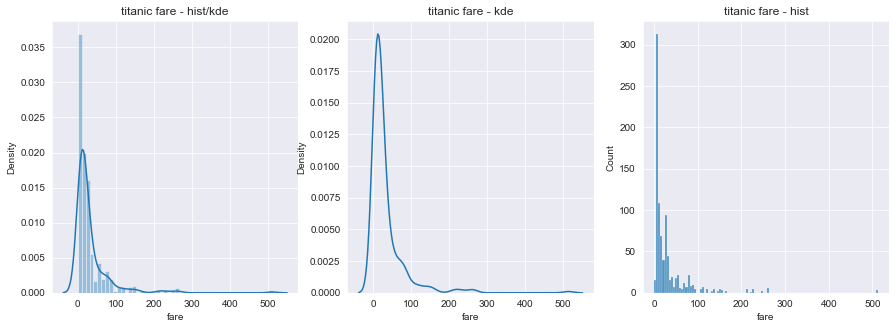

In [4]:
# histogram, kernel density plot

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), nrows=1, ncols=3)

sns.distplot(titanic['fare'], ax=ax1)
sns.kdeplot(x='fare', data=titanic, ax=ax2)
sns.histplot(x='fare', data=titanic, ax=ax3)

ax1.set_title('titanic fare - hist/kde')
ax2.set_title('titanic fare - kde')
ax3.set_title('titanic fare - hist')

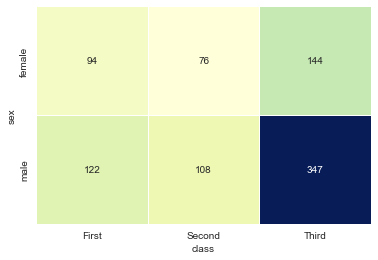

In [5]:
# heatmap (for categorical data)

table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
table

sns.heatmap(table, 
            annot=True, fmt='d',  # integer
            cmap='YlGnBu',        # color map
            linewidth=.5,         # demarcating line
            cbar=False)           # color bar

plt.show()

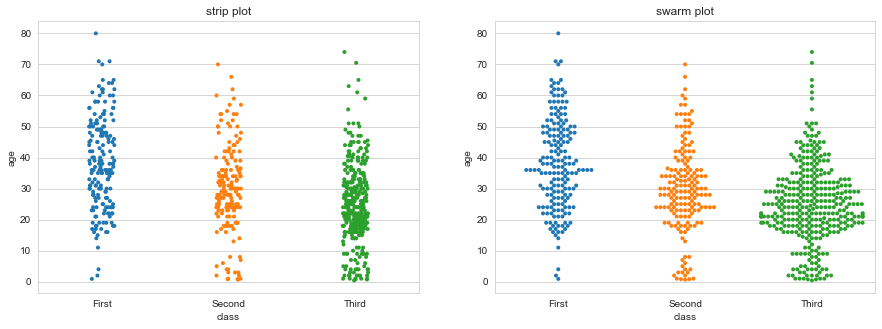

In [6]:
# scatter plot (for categorical data)

sns.set_style('whitegrid')

fig, (ax1, ax2) = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)

sns.stripplot(x='class', y='age', data=titanic, ax=ax1, size=4)
sns.swarmplot(x='class', y='age', data=titanic, ax=ax2, size=4) # factor in var

ax1.set_title('strip plot')
ax2.set_title('swarm plot')

plt.show()

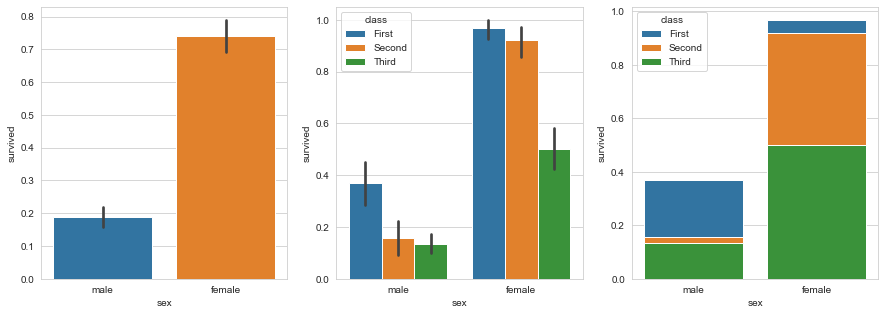

In [7]:
# bar plot

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), nrows=1, ncols=3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)
sns.barplot(x='sex', y='survived', hue='class', dodge=False, ci=None, data=titanic, ax=ax3) # ci = confidence interval

plt.show()

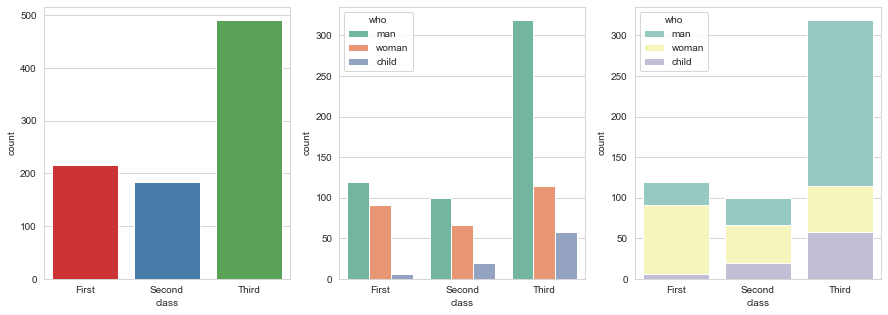

In [8]:
# count plot

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), nrows=1, ncols=3)

sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)

plt.show()

<AxesSubplot:xlabel='alive', ylabel='age'>

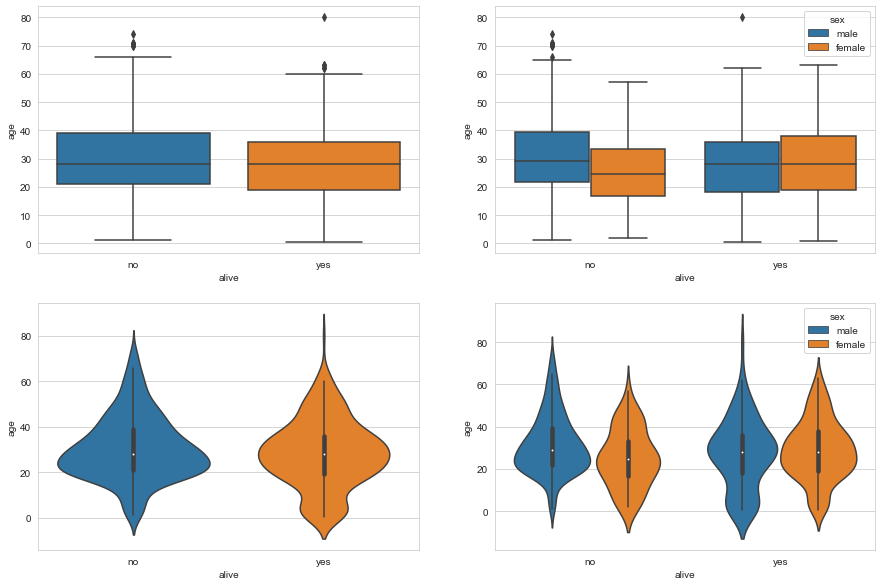

In [9]:
# box plot / violin plot

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(15, 10), nrows=2, ncols=2)

sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

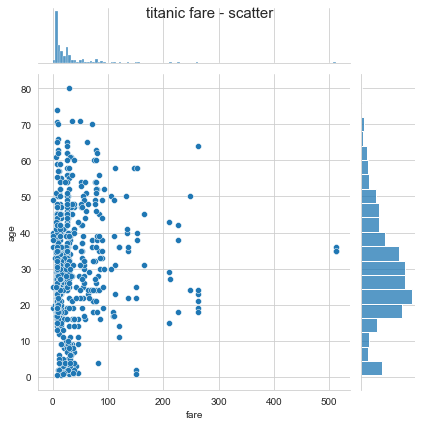

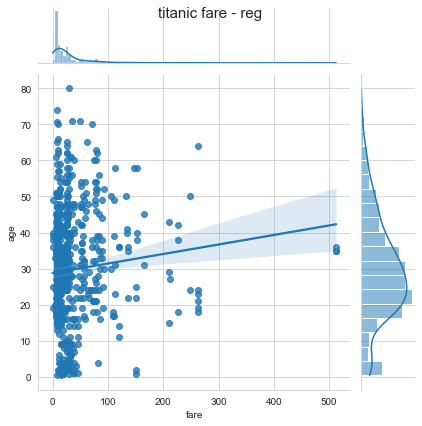

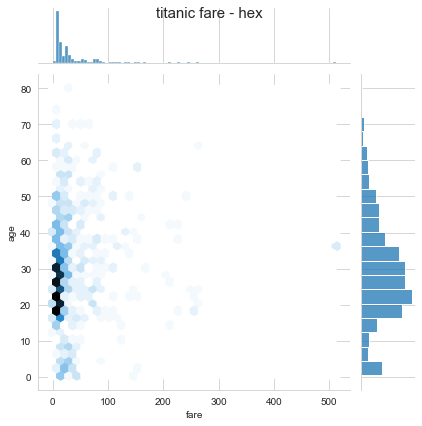

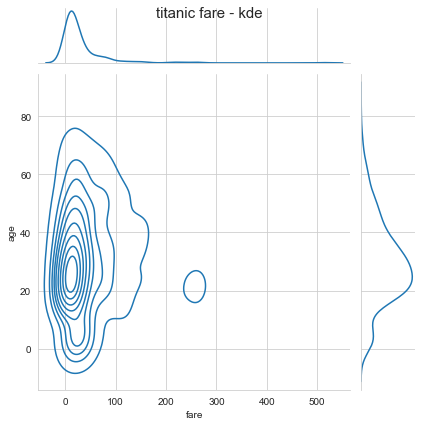

In [10]:
# joint plot

j1 = sns.jointplot(x='fare', y='age', data=titanic)
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic) # regression line
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic) # hexagonal
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic) # kernel density

j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

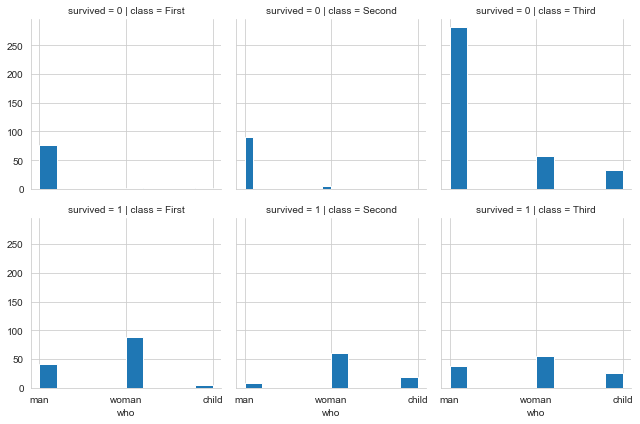

In [11]:
# FacetGrid

# divide grid according to conditions
g = sns.FacetGrid(data=titanic, col='class', row='survived')

# draw graphs
g = g.map(plt.hist, 'who')

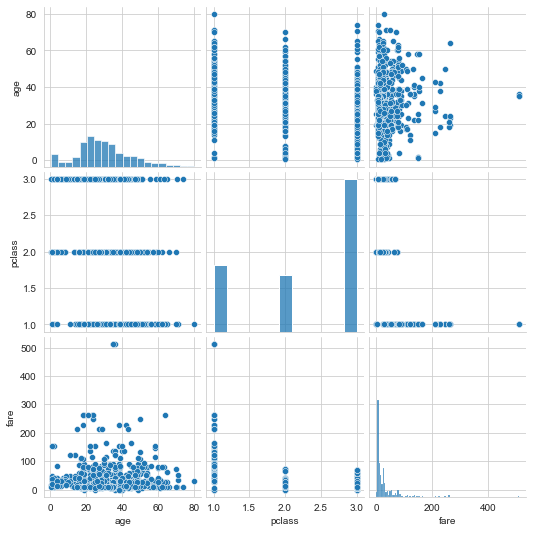

In [12]:
# pairplot

titanic_pair = titanic[['age', 'pclass', 'fare']]
g = sns.pairplot(titanic_pair)